# Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("NumPy Version:", np.__version__)

NumPy Version: 1.26.4


In [8]:
diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")

In [9]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Information about the dataset

- The dataset contains
    - **9** columns
    - **100000** rows

**Explanation of each column**:
- **gender**: Gender of the patient (Male/Female).
- **age**: Age of the patient.
- **hypertension**: Indicates if the patient has hypertension (1 = Yes, 0 = No).
- **heart_disease**: Indicates if the patient has heart disease (1 = Yes, 0 = No).
- **smoking_history**: Patient's smoking history (e.g., current, never, No Info).
- **bmi**: Body mass index (kg/m²).
- **HbA1c_level**: Glycated hemoglobin level (%), reflecting average blood sugar.
- **blood_glucose_level**: Current blood glucose level (mg/dL).
- **diabetes**: Indicates if the patient has diabetes (1 = Yes, 0 = No).

# **Explolatory Data Analysis**

### Basic Data Inspection

In [10]:
diabetes_df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].agg(['min', 'max'])

,age,bmi,HbA1c_level,blood_glucose_level
min,0.08,10.01,3.5,80
max,80.00,95.69,9.0,300


In [11]:
# number of rows and Columns in this dataset
diabetes_df.shape

(100000, 9)

In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Conclusion:
The dataset comprises **100,000 entries** and includes **9 columns** that encompass various attributes related to diabetes. The following insights can be observed:

1. **Data Completeness**: All columns contain **100,000 non-null entries**, indicating that there are no missing values in the dataset. This is crucial for ensuring the reliability of any analysis or modeling performed using this data.

2. **Data Types**:
   - The dataset includes a mix of data types:
     - **3 columns** (age, bmi, HbA1c_level) are of type **float64**, allowing for continuous numerical values.
     - **4 columns** (hypertension, heart_disease, blood_glucose_level, diabetes) are of type **int64**, indicating they represent discrete numerical categories, such as binary outcomes (0 or 1).
     - **2 columns** (gender, smoking_history) are of type **object**, suggesting that they contain categorical data.

In [15]:
# getting the statistical summary measures of the data
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Conclusion: Summary statistics

1. **Age**:
   - The average age of individuals is approximately **41.89 years**, with a significant **standard deviation** of **22.52 years**, indicating a wide age range.
   - Ages range from a minimum of **0.08 years** (indicating very young individuals) to a maximum of **80 years**. The median age is **43 years**, suggesting that many individuals fall within the middle-aged category.

2. **Hypertension**:
   - The mean value of **0.075** indicates that about **7.5%** of participants have hypertension. The standard deviation of **0.26** reflects the binary nature (0 or 1) of this feature.

3. **Heart Disease**:
   - With a mean of **0.039**, only approximately **3.9%** of individuals report having heart disease, indicating its relative rarity in this dataset.

4. **Body Mass Index (BMI)**:
   - The average BMI is **27.32**, suggesting a tendency towards overweight among the population. The values range from a minimum of **10.01** to a maximum of **95.69**, showing substantial variability.

5. **HbA1c Level**:
   - The average HbA1c level is **5.53**, with levels ranging from **3.5** to **9.0**. The standard deviation of **1.07** indicates some variability in glycemic control.

6. **Blood Glucose Level**:
   - The average blood glucose level is **138.06**, with a significant range (minimum **80** to maximum **300**). The standard deviation of **40.71** indicates notable variability, with some individuals possibly experiencing uncontrolled diabetes.

7. **Diabetes Outcome**:
   - The diabetes outcome shows a mean of **0.085**, suggesting that approximately **8.5%** of participants are diagnosed with diabetes. The binary nature of this variable is reflected in its standard deviation of **0.28**.

# Univariate Analysis

In [16]:
diabetes_df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [17]:
diabetes_df['hypertension'].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [18]:
diabetes_df['heart_disease'].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [19]:
diabetes_df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [20]:
diabetes_df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [21]:
diabetes_df['blood_glucose_level'].unique().sum()

3028

In [22]:
diabetes_df['HbA1c_level'].unique().sum()

112.0

In [23]:
# Missing value analysis
print("\nMissing Values Count by Column:")
missing_values = diabetes_df.isnull().sum()

# Filter columns with missing values and display them
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")
    elif count==0:
        print("No missing values found.")


Missing Values Count by Column:
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.
No missing values found.


In [24]:
# Duplicate Values analysis

duplicate_count = diabetes_df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 3854


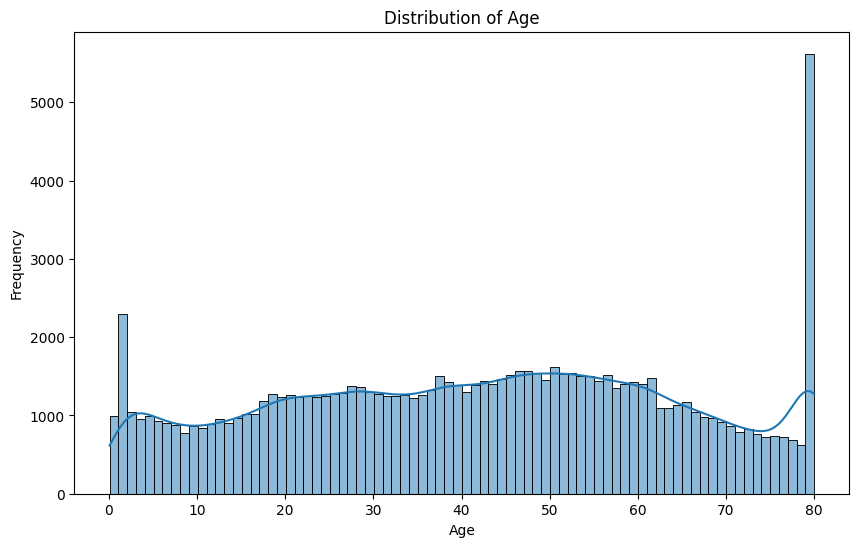

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_df["age"], kde=True, bins=80)
plt.title(f"Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [26]:
# Check for decimal values in age column
decimal_ages = diabetes_df[diabetes_df['age'] % 1 != 0]['age']

# Count the decimal values in each range
range_0_1 = decimal_ages[(decimal_ages >= 0) & (decimal_ages < 1)].count()
range_1_2 = decimal_ages[(decimal_ages >= 1) & (decimal_ages < 2)].count()
range_2_3 = decimal_ages[(decimal_ages >= 2) & (decimal_ages < 3)].count()

# Print the results
print(f"Number of decimal values between 0 and 1: {range_0_1}")
print(f"Number of decimal values between 1 and 2: {range_1_2}")
print(f"Number of decimal values between 2 and 3: {range_2_3}")

Number of decimal values between 0 and 1: 911
Number of decimal values between 1 and 2: 1107
Number of decimal values between 2 and 3: 0


In [27]:
# Filter decimal values greater than 2 in the 'age' column
decimal_ages_after_2 = diabetes_df[(diabetes_df['age'] > 2) & (diabetes_df['age'] % 1 != 0)]['age']

# Check if there are any such values and print the results
if not decimal_ages_after_2.empty:
    print("Decimal values after age 2:")
    print(decimal_ages_after_2)
else:
    print("No decimal values found after age 2.")

No decimal values found after age 2.


### Smoking_history analysis

current        0.019606
ever           0.024080
former         0.097917
never          0.027267
not current    0.020734
diabetes       1.000000
Name: diabetes, dtype: float64


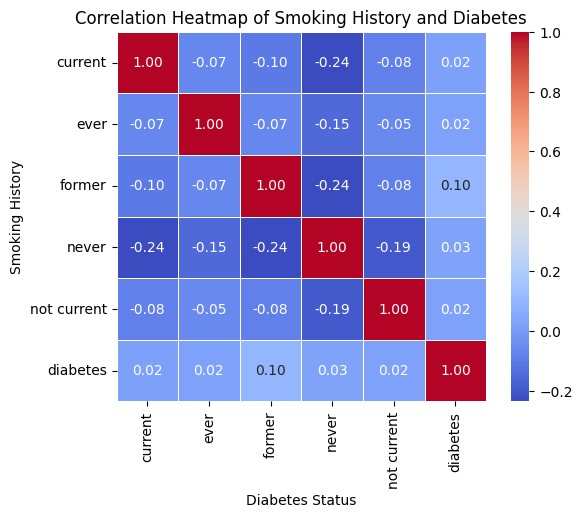

In [28]:
# One-hot encode the categorical column
df_encoded = pd.get_dummies(diabetes_df['smoking_history'], drop_first=True)

# Concatenate the encoded columns with the original DataFrame
df_final = pd.concat([df_encoded, diabetes_df['diabetes']], axis=1)
#print(df_final.head())
# Now calculate correlation between the binary 'diabetes' column and encoded categorical columns
correlation = df_final.corr()

print(correlation['diabetes']) 

# Create a heatmap for smoking history vs diabetes
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Smoking History and Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Smoking History')
plt.show()

### Missing value analysis

There are no **missing values** in any of the features.

### Value counts for categorical values

1. **Gender Distribution**:
   - The dataset consists of **58,552** females (**58.6%**) and **41,430** males (**41.4%**), indicating a higher representation of females. A small number of individuals **18** identify as "Other". Therefore we can see a **class imbalance**.

   - With only **18** entries in the "Other" category compared to over 58,000 females and 41,000 males, this class is extremely underrepresented. 

2. **Hypertension Prevalence**:
   - A significant majority of participants, **92,515** (**92.5%**), do not have hypertension, while **7,485** individuals (**7.5%**) are identified as having hypertension. This suggests that hypertension is relatively uncommon in this population.

3. **Heart Disease Incidence**:
   - The vast majority of participants, **96,058** , do not have heart disease. In contrast, **3,942** individuals (**3.9%**) have been diagnosed with heart disease, indicating a low prevalence of this condition within the dataset.

4. **Smoking History**:
   - A substantial number of participants report a lack of information regarding their smoking status (**35,816**). Among those with known smoking histories, **35,095** never smoked, **9,352** are former smokers, **9,286** currently smoke, and **6,447** are classified as "not current" smokers.

5. **Diabetes Diagnosis**:
   - The dataset shows that **91,500** individuals (**91.5%**) do not have diabetes, while **8,500** individuals (**8.5%**) are diagnosed with diabetes. This relatively low prevalence of diabetes suggests that most participants are not affected by this condition.

### Duplicate Values analysis

There are total **3854** Duplicate Rows.

### Analysis of the feature "Age"

Based on the analysis of the `age` column in the dataset, we can draw the following conclusions regarding the presence of decimal values:

1. **Decimal Values Distribution**:
   - There are **911 decimal values** between **0 and 1**.
   - The count of decimal values between **1 and 2** is **1107**.
   - There are **no decimal values** found between **2 and 3**, indicating that all values in this range are **discrete**.

2. **Decimal Values After Age 2**:
   - There are **no decimal values** found for ages **greater than 2**. This suggests that the ages above 2 are entirely represented by whole numbers.

# Bivariate Analysis 

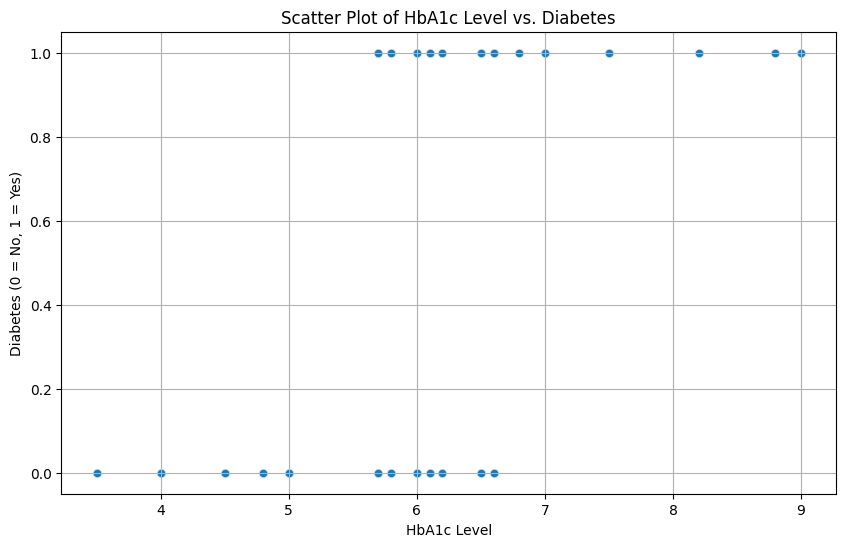

In [29]:
# Scatter plot for HbA1c_level vs. diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes_df, x='HbA1c_level', y='diabetes', alpha=0.6)
plt.title('Scatter Plot of HbA1c Level vs. Diabetes')
plt.xlabel('HbA1c Level')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

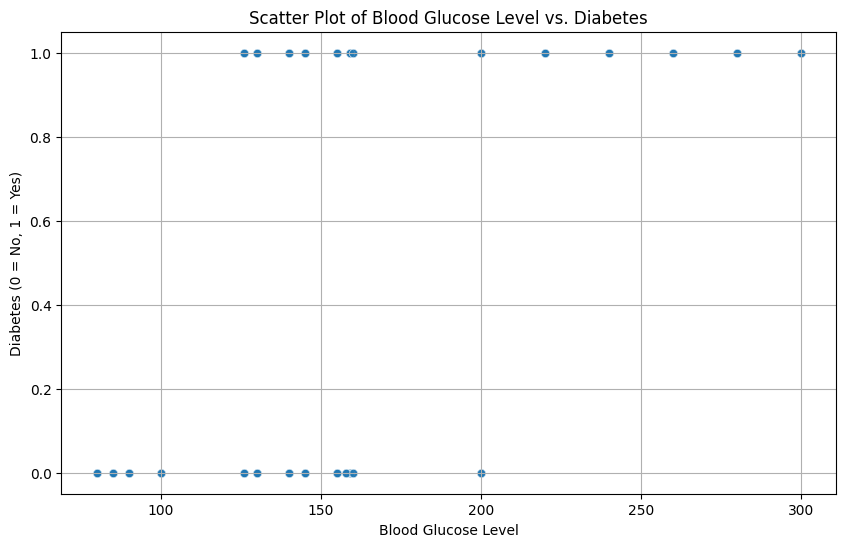

In [30]:
# Scatter plot for blood_glucose_level vs. diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes_df, x='blood_glucose_level', y='diabetes', alpha=0.6)
plt.title('Scatter Plot of Blood Glucose Level vs. Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

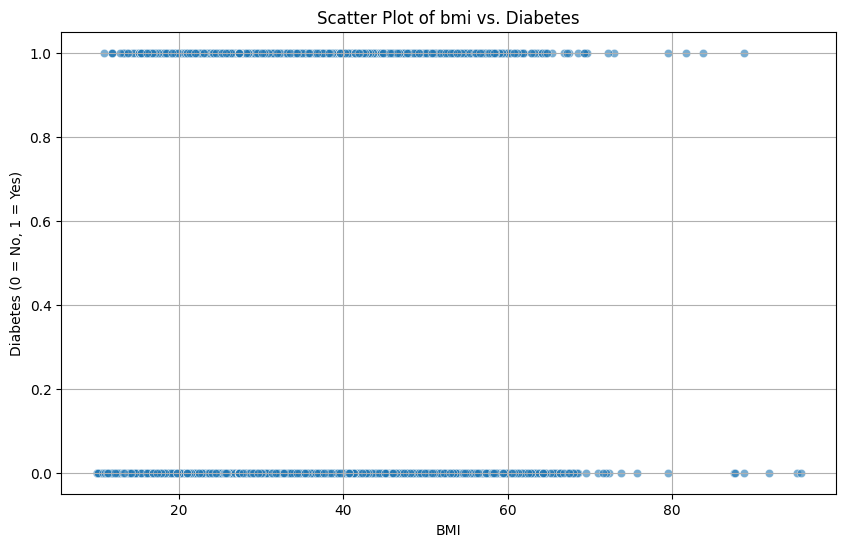

In [31]:
# Scatter plot for BMI vs. diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes_df, x='bmi', y='diabetes', alpha=0.6)
plt.title('Scatter Plot of bmi vs. Diabetes')
plt.xlabel('BMI')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()

### HbA1c_level vs Diabetes
 -  Below **5** there is no chance of diabetes

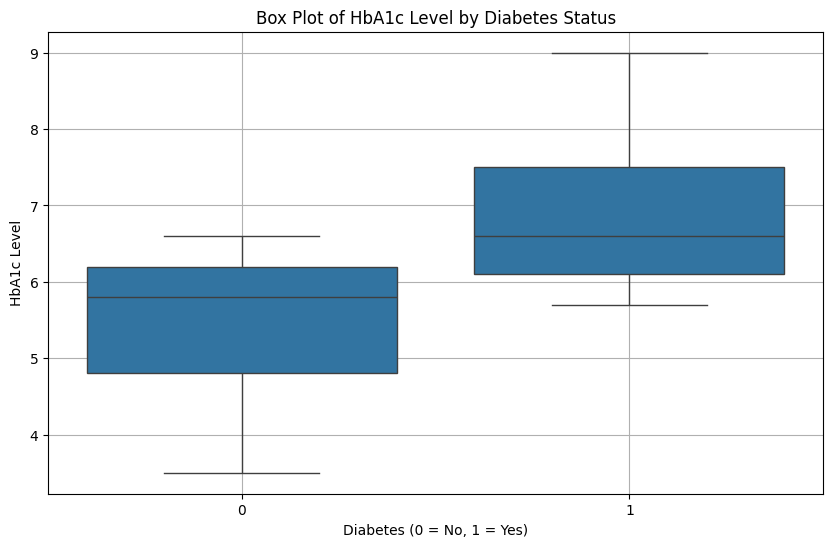

In [32]:
# Box plot for HbA1c_level by diabetes status
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=diabetes_df)
plt.title('Box Plot of HbA1c Level by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level')
plt.grid(True)
plt.show()

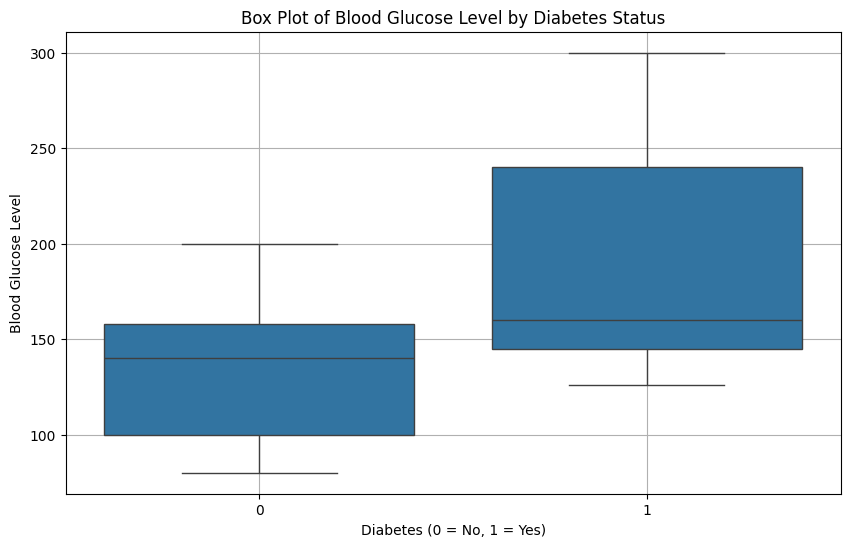

In [33]:
# Box plot for blood_glucose_level by diabetes status
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes_df)
plt.title('Box Plot of Blood Glucose Level by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()

<Axes: xlabel='age_group', ylabel='count'>

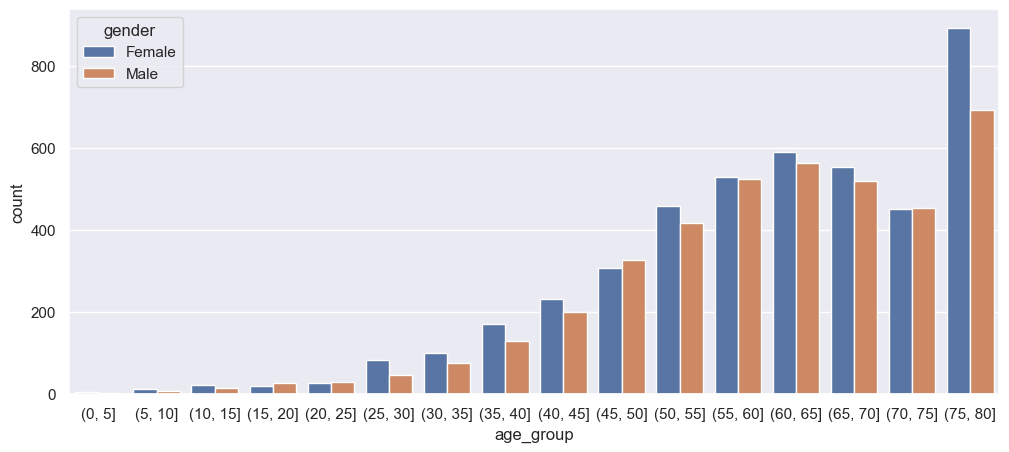

In [34]:
# Create age groups with a 5-year gap
grouping = range(int(diabetes_df['age'].min()),int(diabetes_df['age'].max())+5,5)
diabetes_df['age_group']=pd.cut(diabetes_df['age'],bins=grouping)

# Filter for diabetic patients
data_diabetic=diabetes_df[diabetes_df['diabetes']==1]

# Plot the count of each age group
sns.set(rc={'figure.figsize':(12,5)})
sns.countplot(x='age_group',hue='gender',data=data_diabetic)

In [35]:
diabetes_df.drop(columns=['age_group'], inplace=True)

In [36]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Scatter Plot of HbA1c Level vs. Diabetes
- Below and equal to **5** there is no diabetes.
- Between **5** and **7** it can be both cases.
- Above **5.5(approx)** there is **100%** diabetes.
  
### Scatter Plot of Blood Glucose Level vs. Diabetes
- Below and equal to **100** there is no diabetes.
- Between **100** and **200** it can be both cases.
- Above **200** there is **100%** diabetes.
  
### Scatter Plot of BMI vs. Diabetes
- There is nothing conclusive or any visible relation between both features.
  
### Box Plot of Blood Glucose Level by Diabetes Status
The box plot of **blood glucose levels** by diabetes status shows the following:

- **Individuals with diabetes (1)** generally have higher blood glucose levels, with most values ranging between **150 and 280**, and a median around **200**. 
- **Non-diabetic individuals (0)** exhibit lower blood glucose levels, with most values between **100 and 175**, and a median around **150**.

This clear difference in blood glucose levels between diabetic and non-diabetic individuals reinforces the fact that higher blood glucose levels are strongly associated with diabetes. The wider range and presence of outliers for the diabetic group suggests variability in blood glucose control among those with diabetes.

### Box Plot of HbA1c Level by Diabetes Status

- **Individuals with diabetes (1)** tend to have higher HbA1c levels, typically ranging from **6.5 to 9**, with a median around **7.** 
- **Non-diabetic individuals (0)** generally have lower HbA1c levels, with a median around **5.5**, and most values falling between **4 and 6**.
  
This suggests that HbA1c levels are a good indicator of diabetes, as people with diabetes generally have higher levels than those without.

### Count Plot of Age vs Diabetes Status
- We can observe that roughly **females are more prone to diabetes** as compared to males.
- **Most** of the diabetic patients are from **age group 75-80 years**.
- The graph is more or less in increasing nature which tells that **an older person is more likely to become diabetic**.

### **Multivariate analysis**

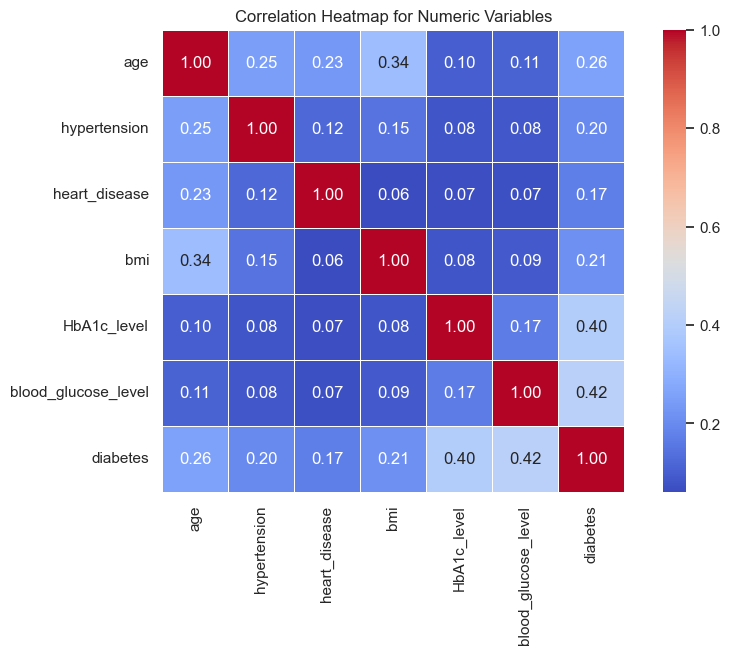

In [37]:
# Select only numeric columns for correlation analysis
numeric_columns = diabetes_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

#### **Correlation Heatmap:**

1. **Diabetes and blood_glucose_level**:
   - **Insight**: The correlation between `Diabetes` and `blood_glucose_level` (0.42) is the strongest, indicating that high blood_glucose_level generally is indication for diabetes.
   - **Implication**: `blood_glucose_level` should be considered a key predictor in the model.
     
2. **Diabetes and HbA1c_level**:
   - **Insight**: The second highest correlation observed is between `diabetes` and `HbA1c_level` (0.40). This strong positive correlation indicates that diabetes is a significant determinant of its HbA1c_level. 
   - **Implication**: `HbA1c_level` should also be considered a key predictor in the model.
     
3. **Age and BMI**:
   - **Insight**: The correlation between `Age, BMI` and `diabetes` (0.26, 0.21 respectively) is moderate, suggesting that the age and BMI contributes to the overall result but not as strongly as HbA1c_level or blood_glucose_level.

4. **Hypertention and heart_disease**:
   - **Insight**: `Hypertention` and `heart_disease` has a lower correlation with `Diabetes`.

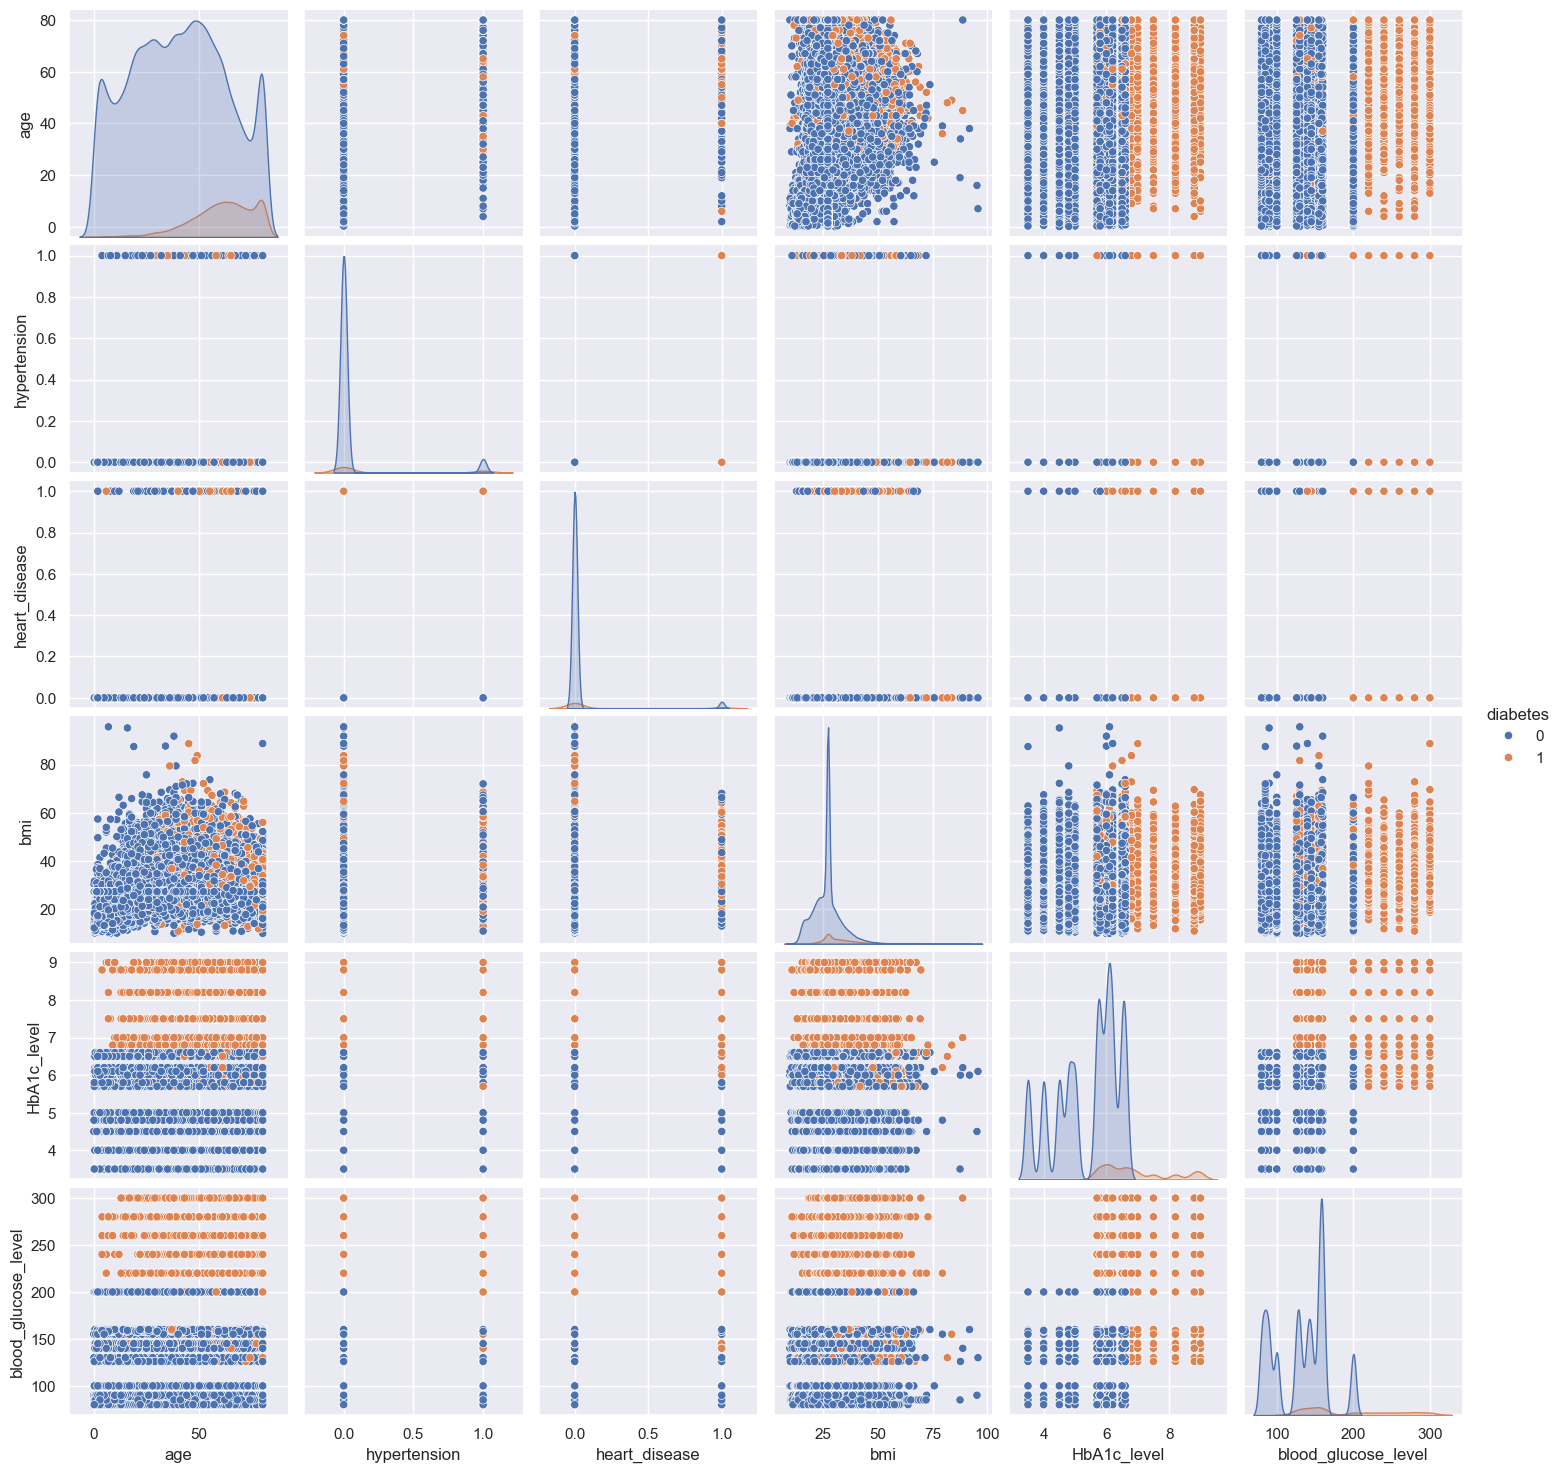

In [38]:
sns.pairplot(diabetes_df, hue='diabetes')
plt.show()

# Confirmatory Data Analysis

### Testing of hypothesis of smoking_history

In [39]:
from scipy.stats import chi2_contingency

# Create a contingency table between the 'smoking_history' column and 'diabetes'
contingency_table = pd.crosstab(diabetes_df[(diabetes_df['smoking_history']!="No Info")]['smoking_history'],diabetes_df['diabetes'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Expected values:\n {expected}")
print(f"Contingency Table:\n{contingency_table}")

Chi-squared statistic: 430.90844207081335
P-value: 5.8181747455178464e-92
Expected values:
 [[ 8266.60021189  1019.39978811]
 [ 3564.44833603   439.55166397]
 [ 8325.35485479  1026.64514521]
 [31242.33625203  3852.66374797]
 [ 5739.26034526   707.73965474]]
Contingency Table:
diabetes             0     1
smoking_history             
current           8338   948
ever              3532   472
former            7762  1590
never            31749  3346
not current       5757   690


### Post Hoc Analysis for smoking_history
**Interpretation of Standardized Residuals**

A standardized residual value greater than +2 or less than -2 typically indicates that the corresponding cell in the contingency table contributes significantly to the Chi-squared statistic.

Positive residuals suggest that the observed count is higher than expected, while negative residuals indicate that the observed count is lower than expected.

In [40]:
observed=contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
print(f"Residuals: \n{residuals}")

Residuals: 
[[ 0.78529613 -2.23627214]
 [-0.5434959   1.54770244]
 [-6.17419959 17.5821452 ]
 [ 2.86647448 -8.1628023 ]
 [ 0.23416242 -0.66681966]]


### **Conclusion: Chi-Square Test for Smoking History and Diabetes**  

#### **1. Hypothesis Testing Results:**  
- **Chi-squared statistic**: **430.91** (a high value indicates strong association).  
- **P-value**: **5.82e-92** (almost zero, meaning the relationship is highly significant).  
- **Conclusion**: We **reject the null hypothesis**, indicating that **smoking history and diabetes are not independent**—there is a significant relationship between them.  

#### **2. Interpretation of Residuals:**  
- **"Former" smokers (Residual = 17.58)**:  
  - **Higher-than-expected diabetes cases** → Strong **positive association** with diabetes.  
- **"Never" smokers (Residual = -8.16)**:  
  - **Lower-than-expected diabetes cases** → Suggests a **protective effect** against diabetes.  
- **"Current" smokers (Residual = -2.24)**:  
  - **Slightly lower-than-expected diabetes cases**, but not as strong as "never" smokers.  
- **"Ever" smokers (Residual = 1.55)** and **"Not Current" smokers (Residual = -0.67)**:  
  - No significant deviation from expected values.  

#### **3. Key Insights:**  
 - **Former smokers show a strong positive correlation with diabetes**, meaning they are more likely to have diabetes than expected.  
 - **Never smokers have significantly lower diabetes rates**, suggesting smoking history might be a risk factor.  
 - **Current smokers do not show a strong correlation**, but this may require further analysis.  

# Data Preprocessing

### Handling Duplicate Values 

There are total **3854** Duplicate Rows.

We are going to remove them and store the new dataset in `diabetes_df_cleaned` variable.

In [41]:
# Drop duplicate rows
diabetes_df_cleaned = diabetes_df.drop_duplicates()

# Check the shape of the new DataFrame to confirm that duplicates were removed
print(f"Original dataset shape: {diabetes_df.shape}")
print(f"Dataset shape after removing duplicates: {diabetes_df_cleaned.shape}")

Original dataset shape: (100000, 9)
Dataset shape after removing duplicates: (96146, 9)


### Handling extreme Class imbalance between genders

Since there are very less data on others, it's better to either remove it or combine it with a bigger class. 

In [42]:
# Remove rows where gender is "Other"
diabetes_df_cleaned = diabetes_df_cleaned[diabetes_df_cleaned['gender'] != 'Other']

# Check the distribution after removal
print(diabetes_df_cleaned['gender'].value_counts())

gender
Female    56161
Male      39967
Name: count, dtype: int64


In [43]:
print(f"Original dataset shape: {diabetes_df.shape}")
print(f"Dataset shape after removing duplicates: {diabetes_df_cleaned.shape}")

Original dataset shape: (100000, 9)
Dataset shape after removing duplicates: (96128, 9)


### Handling Age Values in the Dataset

In our analysis of the diabetes dataset, we observed that the `age` column contained a mixture of continuous and discrete values. Specifically, while some age values were represented as continuous decimals (ages below 2), the majority of the ages above 2 years were whole numbers (discrete values). 

#### Step Taken
1. **Rounding Strategy**: For the identified decimal values:
   - Ages **less than 1** were rounded up to **1**.
   - Ages between **1** and **2** were rounded up to **2**.

#### Rationale:
- **Consistency in Data Representation**: The rounding process aims to convert the continuous age values into discrete values, aligning them with the format of the majority of the data. This standardization enhances the reliability of any statistical analysis or machine learning models we may apply to the dataset.

In [44]:
# Assuming diabetes_df is your DataFrame
def round_age(age):
    if age < 1:
        return 1
    elif 1 <= age < 2:
        return 2
    else:
        return age

# Apply the rounding function to the 'age' column
diabetes_df_cleaned['age'] = diabetes_df_cleaned['age'].apply(round_age)

In [45]:
# Check for any decimal values in the 'age' column
decimal_ages = diabetes_df_cleaned[diabetes_df_cleaned['age'] % 1 != 0]

# Check if there are any decimal valued ages and display them if they exist
if not decimal_ages.empty:
    print("Decimal valued ages found:")
    print(decimal_ages)
else:
    print("No decimal valued ages found in the dataset.")

No decimal valued ages found in the dataset.


### Smoking_history below age 5
In the analysis of the diabetes dataset, we observed that the 'smoking_history' variable contained various categories, with a significant proportion of respondents indicating 'No Info' and 'never.' Given that individuals under the age of 5 are typically not of an age where smoking behavior is applicable, it was deemed appropriate to classify their smoking history as 'never.' 

1. **Relevance**: The classification of smoking history for young children is not meaningful, as they are not likely to have any smoking experience.
2. **Data Integrity**: By standardizing the smoking history of individuals under 5 to 'never,' we improve the consistency of the dataset, making it more accurate for analysis and modeling purposes.

In [46]:
diabetes_df_cleaned['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [47]:
# Update smoking_history for ages less than 5
diabetes_df_cleaned.loc[diabetes_df_cleaned['age'] < 5, 'smoking_history'] = 'never'

# Check the value counts to confirm changes
print(diabetes_df_cleaned['smoking_history'].value_counts())

smoking_history
never          39025
No Info        28328
former          9299
current         9182
not current     6298
ever            3996
Name: count, dtype: int64


## One-Hot encoding smoking_history and genders

In [48]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder with sparse_output=True for memory efficiency
ohe = OneHotEncoder(drop='first', sparse_output=True)  

# Select categorical columns for encoding
categorical_columns = ['gender', 'smoking_history']

# Perform OneHotEncoding on selected categorical columns
encoded_data = ohe.fit_transform(diabetes_df_cleaned[categorical_columns])

# Get the column names for the new OneHotEncoded features
encoded_columns = ohe.get_feature_names_out(categorical_columns)

# Convert the sparse matrix to a DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoded_columns)

# Concatenate the original DataFrame without categorical columns and add the encoded features
diabetes_df_cleaned = pd.concat([diabetes_df_cleaned.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the first few rows
diabetes_df_cleaned.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,0,0,0,0,1.0,0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0,0,0,0,0,0,0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,1.0,0,0,0,1.0,0
3,36.0,0.0,0.0,23.45,5.0,155.0,0.0,0,1.0,0,0,0,0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0,1.0,1.0,0,0,0,0


## Scaling the data

In [49]:
# from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
# scaler = StandardScaler()

# Select the columns to scale
# columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply the scaler to the selected columns
# diabetes_df_cleaned[columns_to_scale] = scaler.fit_transform(diabetes_df_cleaned[columns_to_scale])

# View the scaled DataFrame
# diabetes_df_cleaned.head()

- We are using **MinMax Scaling** because most of the features of the dataset does not follow normal distributuion.

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Select the same columns to scale
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply the MinMaxScaler to the selected columns
diabetes_df_cleaned[columns_to_scale] = minmax_scaler.fit_transform(diabetes_df_cleaned[columns_to_scale])

# View the scaled DataFrame
diabetes_df_cleaned.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0,0,0,0,1.0,0
1,0.670886,0.0,0.0,0.202031,0.563636,0.000000,0.0,0,0,0,0,0,0
2,0.341772,0.0,0.0,0.202031,0.400000,0.354545,0.0,1.0,0,0,0,1.0,0
3,0.443038,0.0,0.0,0.156863,0.272727,0.340909,0.0,0,1.0,0,0,0,0
4,0.949367,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,1.0,0,0,0,0


In [43]:
# Save the cleaned DataFrame to a CSV file
diabetes_df_cleaned.to_csv('diabetes_cleaned_minmax.csv', index=False)

In [51]:
diabetes_df_final = pd.read_csv('diabetes_cleaned_minmax.csv')

In [52]:
# separating the data and labels
X = diabetes_df_final.drop(columns = 'diabetes', axis=1)
Y = diabetes_df_final['diabetes']

In [53]:
X.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,0.563636,0.272727,0,0,0,0,1,0
1,0.670886,0,0,0.202031,0.563636,0.000000,0,0,0,0,0,0
2,0.341772,0,0,0.202031,0.400000,0.354545,1,0,0,0,1,0
3,0.443038,0,0,0.156863,0.272727,0.340909,0,1,0,0,0,0
4,0.949367,1,1,0.118231,0.236364,0.340909,1,1,0,0,0,0
5,0.240506,0,0,0.202031,0.563636,0.022727,0,0,0,0,1,0
6,0.544304,0,0,0.108543,0.545455,0.545455,0,0,0,0,1,0
7,0.987342,0,0,0.161648,0.400000,0.022727,0,0,0,0,0,0
8,0.518987,0,0,0.275794,0.236364,0.295455,1,0,0,0,1,0
9,0.392405,0,0,0.202031,0.272727,0.090909,0,0,0,0,1,0


In [54]:
X.tail(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
96118,0.278481,0,0,0.091737,0.418182,0.090909,0,1,0,0,0,0
96119,0.227848,0,0,0.183707,0.272727,0.295455,0,0,0,0,0,1
96120,0.265823,0,0,0.229225,0.454545,0.000000,0,0,0,0,1,0
96121,0.316456,0,0,0.283964,0.545455,0.363636,1,0,0,0,1,0
96122,0.493671,0,0,0.358077,0.000000,0.340909,0,0,0,0,0,1
96123,0.443038,0,0,0.170285,0.236364,0.295455,0,0,0,0,0,0
96124,0.012658,0,0,0.085901,0.545455,0.090909,1,1,0,0,0,0
96125,0.822785,0,0,0.207983,0.400000,0.340909,0,0,0,1,0,0
96126,0.291139,0,0,0.296569,0.090909,0.090909,1,0,0,1,0,0
96127,0.708861,0,0,0.144958,0.563636,0.045455,0,0,0,0,1,0


In [55]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: diabetes, dtype: int64

In [56]:
Y.tail(10)

96118    0
96119    0
96120    0
96121    0
96122    0
96123    0
96124    0
96125    0
96126    0
96127    0
Name: diabetes, dtype: int64

# Spliting data

In [57]:
from sklearn.model_selection import train_test_split

# First split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Now split the training set further into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, stratify=Y_train, random_state=2)

In [58]:
# Check the sizes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (57676, 12)
Validation set size: (19226, 12)
Test set size: (19226, 12)


Explanation:
- The first split divides the data into **80%** training and **20%** test.
- The second split takes the training data and splits it further into 75% training and 25% validation, which means that after both splits:
    - **60%** of the data is used for training.
    - **20%** is used for validation.
    - **20%** is used for testing.

# Model Building

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [60]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

# Model Training

In [61]:
for name, md in models.items():
    md.fit(X_train, Y_train)
    ypred = md.predict(X_test)

    print(f"{name} with accuracy : {accuracy_score(Y_test,ypred)}")

Logistic Regression with accuracy : 0.959533964423177
Naive Bayes with accuracy : 0.9010194528243004
Support Vector Machine with accuracy : 0.9602621450119629
K-Nearest Neighbors with accuracy : 0.960886299802351
Decision Tree with accuracy : 0.9499635909705607
Random Forest with accuracy : 0.9706127119525643
Bagging with accuracy : 0.9679600540934151


C:\Users\projj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with accuracy : 0.9729532924165193
Gradient Boosting with accuracy : 0.9728492666181213
Extra Trees with accuracy : 0.9435660043690836


In [62]:
GBA = GradientBoostingClassifier()
GBA.fit(X_train,Y_train)

GradientBoostingClassifier()

In [63]:
# Predict on the validation set
y_val_pred = GBA.predict(X_val)

### Training a neural network on the data

In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network architecture
model = models.Sequential()
# Input layer and a dense hidden layer with 32 neurons and ReLU activation
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
# Add another hidden layer with 16 neurons and ReLU activation
model.add(layers.Dense(16, activation='relu'))
# Output layer (assuming binary classification, so using sigmoid)
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

C:\Users\projj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [66]:
# Train the model
history = model.fit(X_train, Y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_val, Y_val))

Epoch 1/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8806 - loss: 0.3099 - val_accuracy: 0.9556 - val_loss: 0.1304
Epoch 2/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9570 - loss: 0.1236 - val_accuracy: 0.9585 - val_loss: 0.1177
Epoch 3/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9567 - loss: 0.1203 - val_accuracy: 0.9590 - val_loss: 0.1161
Epoch 4/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9558 - loss: 0.1236 - val_accuracy: 0.9592 - val_loss: 0.1166
Epoch 5/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9579 - loss: 0.1188 - val_accuracy: 0.9604 - val_loss: 0.1164
Epoch 6/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9582 - loss: 0.1209 - val_accuracy: 0.9617 - val_loss: 0.1123
Epoch 7/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9591 - loss: 0.1168 - val_accuracy: 0.9628 - val_loss: 0.1103
Epoch 8/20
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9595 - loss: 0.1161 - 

# Model Evaluation

### Machine Leaning models evaluation

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [68]:
# Calculate accuracy on validation set
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# Print a detailed classification report
print("Classification Report for Validation Set:")
print(classification_report(Y_val, y_val_pred))

# Optionally, predict on the test set and evaluate
y_test_pred = GBA.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report for test set
print("Classification Report for Test Set:")
print(classification_report(Y_test, y_test_pred))

Validation Accuracy: 0.9723291376261313
Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17529
           1       0.99      0.70      0.82      1697

    accuracy                           0.97     19226
   macro avg       0.98      0.85      0.90     19226
weighted avg       0.97      0.97      0.97     19226

Test Accuracy: 0.9728492666181213
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17530
           1       0.99      0.70      0.82      1696

    accuracy                           0.97     19226
   macro avg       0.98      0.85      0.90     19226
weighted avg       0.97      0.97      0.97     19226



### Neural Netwrok evaluation

In [69]:
# Get accuracy and loss from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

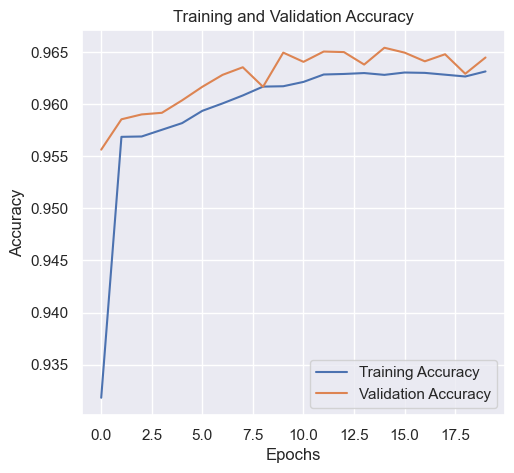

In [70]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, train_accuracy, label='Training Accuracy')
plt.plot(history.epoch, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

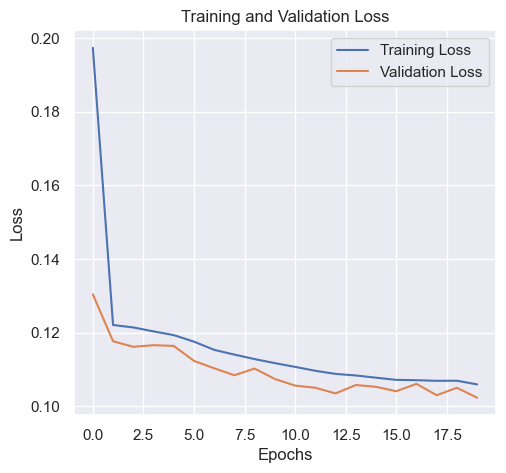

In [71]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.epoch, train_loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step


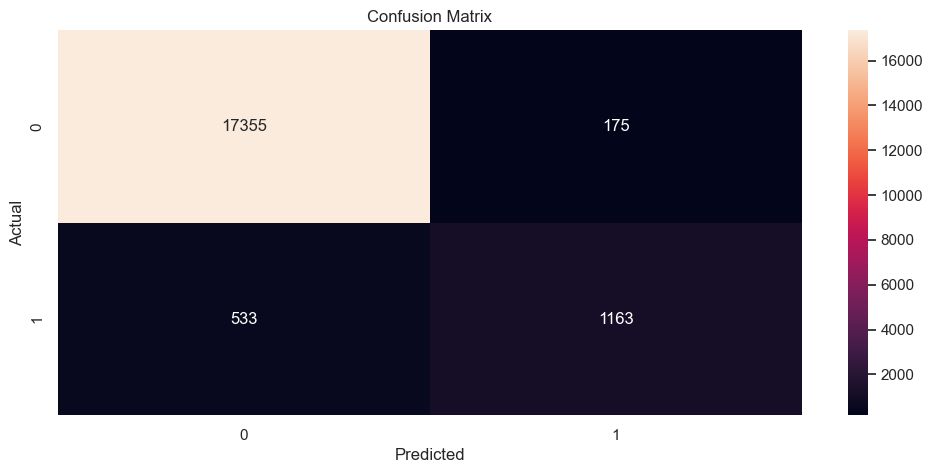

In [72]:
# Predict the test set
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Saving

In [73]:
import joblib

# Save the Gradient Boosting model (GBA)
joblib.dump(GBA, 'diabetes_GBA_model.pkl')

# Save the OneHotEncoder
joblib.dump(ohe, 'diabetes_onehot_smoking_and_gender_encoder.pkl')

# Save the MinMaxScaler
joblib.dump(minmax_scaler, 'diabetes_minmax_scaler.pkl')

print("Model, Encoder, and Scaler saved successfully!")

Model, Encoder, and Scaler saved successfully!


# Predictive system

In [74]:
for column in X.columns:
  print(column)

age
hypertension
heart_disease
bmi
HbA1c_level
blood_glucose_level
gender_Male
smoking_history_current
smoking_history_ever
smoking_history_former
smoking_history_never
smoking_history_not current


In [75]:
# Load the trained model, encoder, and scaler
GBA = joblib.load('diabetes_GBA_model.pkl')
ohe = joblib.load('diabetes_onehot_smoking_and_gender_encoder.pkl')
minmax_scaler = joblib.load('diabetes_minmax_scaler.pkl')

# Define columns used in training
categorical_columns = ['gender', 'smoking_history']
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
all_features = [
    'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
    'gender_Male', 'smoking_history_current', 'smoking_history_ever',
    'smoking_history_former', 'smoking_history_never', 'smoking_history_not current'
]

def preprocess_new_data(new_data):
    """
    Preprocess new input data before making predictions.
    
    Args:
        new_data (pd.DataFrame): New data with categorical and numerical features.
        
    Returns:
        pd.DataFrame: Preprocessed data, ready for model prediction.
    """
    
    # Step 1: One-Hot Encode categorical columns
    encoded_data = ohe.transform(new_data[categorical_columns])
    encoded_columns = ohe.get_feature_names_out(categorical_columns)
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns, index=new_data.index)  # Fix warning

    # Step 2: Drop original categorical columns and merge encoded data
    new_data = new_data.drop(columns=categorical_columns)
    new_data = pd.concat([new_data, encoded_df], axis=1)

    # Step 3: Scale numerical columns
    new_data[columns_to_scale] = minmax_scaler.transform(new_data[columns_to_scale])

    # Step 4: Ensure all features are in the correct order
    missing_cols = set(all_features) - set(new_data.columns)
    for col in missing_cols:
        new_data[col] = 0  # Add missing columns with default value

    new_data = new_data[all_features]  # Ensure correct column order

    return new_data


# Example new data (make sure it includes all required features)
new_input_data = pd.DataFrame({
    'age': [45],
    'hypertension': [0],  # Missing before
    'heart_disease': [0],  # Missing before
    'bmi': [28.5],
    'HbA1c_level': [6.1],
    'blood_glucose_level': [100],
    'gender': ['Male'],
    'smoking_history': ['never']
})

# Preprocess the new data
processed_data = preprocess_new_data(new_input_data)

# Make predictions
prediction = GBA.predict(processed_data)
print("Diabetes Prediction:", prediction[0])  # 0 = No Diabetes, 1 = Diabetes

Diabetes Prediction: 0
